## Stancato: Basic BSU Transit System Analysis

First we load in our packages and read our data.

In [123]:
import numpy as np
import datetime
import pandas as pd
import matplotlib.pyplot as plot

In [124]:
df = pd.DataFrame(pd.read_csv("entries_1.csv"))

We also want to format some of our columns while loading in the data for an easier time later on.

In [125]:
df[['date','time']] = df.timestamp.str.split(expand=True)
df['date'] = pd.to_datetime(df['date'])
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [126]:
mapping = pd.DataFrame(pd.read_csv("stop_loop_mapping.csv"))

In [127]:
buses = pd.DataFrame(pd.read_csv("buses.csv"))

In [128]:
loops = pd.DataFrame(pd.read_csv("loops.csv"))

In [129]:
stops = pd.DataFrame(pd.read_csv("stops.csv"))

In [130]:
users = pd.DataFrame(pd.read_csv("users.csv"))

Now we want to rename our columns with their true values before analysing so we understand what is categorical and what is numerical.

In [131]:
stops.set_index('id')['stop_name']
loops.set_index('id')['loop_name']
buses.set_index('id')['bus_number']

id
1      93
2      96
3     123
4     112
5     900
6     901
7     902
8     903
9     904
10    905
11    918
12    919
13    920
14    921
15    922
16    923
17    906
18    310
19    907
Name: bus_number, dtype: int64

In [132]:
df['stop_id'] = df['stop_id'].replace(stops.set_index('id')['stop_name'])
df['loop_id'] = df['loop_id'].replace(loops.set_index('id')['loop_name'])
df['bus_id'] = df['bus_id'].replace(buses.set_index('id')['bus_number'])

In [133]:
df['month'] = pd.DatetimeIndex(df['date']).month
df['day'] = pd.DatetimeIndex(df['timestamp']).day
df['day_of_year'] = df['timestamp'].dt.dayofyear
df['hour'] = pd.to_datetime(df['timestamp']).dt.hour

This is our main data set that we will be using for this analysis. We can make smaller data sets from this.

In [134]:
for col in ['stop_id', 'loop_id', 'bus_id', 'semester']:
    df[col] = df[col].astype('category')

In [135]:
df.dtypes

boarded                 int64
stop_id              category
timestamp      datetime64[ns]
date_added             object
loop_id              category
driver_id               int64
id                      int64
left_behind             int64
bus_id               category
semester             category
is_deleted              int64
date           datetime64[ns]
time                   object
month                   int64
day                     int64
day_of_year             int64
hour                    int64
dtype: object

We first want to plot some graphs initally, jsut to get a feel for how the data behaves.

<AxesSubplot:>

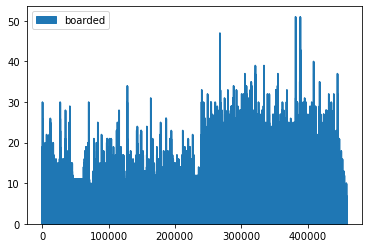

In [136]:
df.plot.area(y='boarded')

<AxesSubplot:>

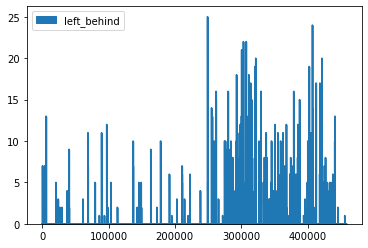

In [137]:
df.plot.area(y='left_behind')

We can already see a trend between the first half of the year and the second half of the year.

<AxesSubplot:>

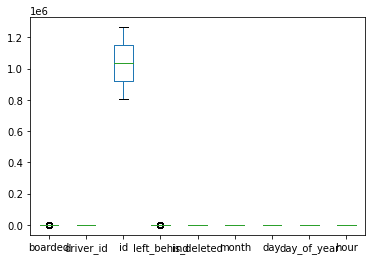

In [138]:
df.plot.box()

This plot did not give us much information. Moving on from there, let's look at some scatter plots.

<AxesSubplot:xlabel='loop_id', ylabel='left_behind'>

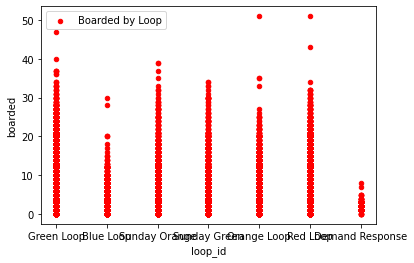

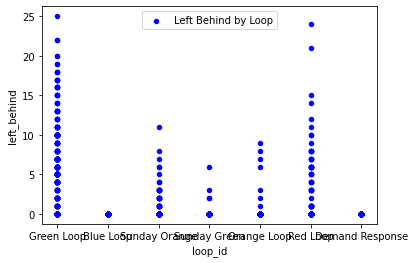

In [139]:
df.plot.scatter(x=4, y=0, color = 'Red',label='Boarded by Loop' )
df.plot.scatter(x=4, y=7, color = 'Blue',label='Left Behind by Loop' )

These initial plots are for all the data in the dataframe, not grouped by month, day, stop, or loop. Let's also look at some pie charts to understand further.

<AxesSubplot:xlabel='loop_id', ylabel='left_behind'>

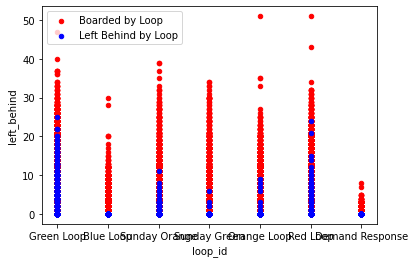

In [140]:
ax = df.plot.scatter(x=4, y=0, color = 'Red',label='Boarded by Loop' )
df.plot.scatter(x=4, y=7, color = 'Blue',label='Left Behind by Loop', ax = ax )

In [141]:
loop_avg = df['boarded'].groupby([df['loop_id']]).mean()

<AxesSubplot:ylabel='boarded'>

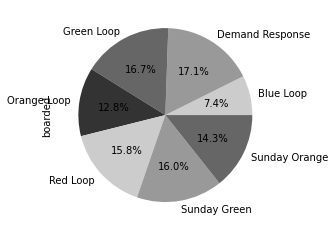

In [93]:
color_set = ['0.80','0.60','0.40','0.20']
loop_avg.plot.pie(normalize=True, autopct='%1.1f%%', colors=color_set)
# From this graph we can see that on average, the Demand Response loop is the busiest loop.

In [94]:
semester_avg = df['boarded'].groupby([df['semester']]).mean()

<AxesSubplot:ylabel='boarded'>

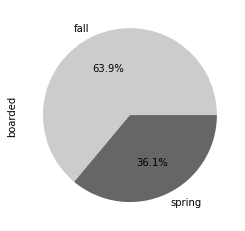

In [95]:
color_set = ['0.80','0.40']
semester_avg.plot.pie(normalize=True, autopct='%1.1f%%', colors=color_set)

From this, we can see that the fall semester is, on average, nearly twice as busy as the spring semester. This is why looking at each semester separately will be beneficial as we analyze.

In [142]:
stop_avg = df['boarded'].groupby([df['stop_id']]).mean()

In [143]:
stop_avg

stop_id
AJ                         1.065767
Administration Building    1.000000
Alumni                     0.172098
Anthony Apts               1.113636
Anthony N-B                0.206465
                             ...   
Student Rec Cntr           1.060000
Teachers College           1.386364
Whitinger                  1.250000
Woodworth                  1.550000
Worthen Arena              1.400000
Name: boarded, Length: 87, dtype: float64

In [144]:
stop_avg = pd.DataFrame(stop_avg)
stop_avg

,boarded
stop_id,
AJ,1.065767
Administration Building,1.000000
Alumni,0.172098
Anthony Apts,1.113636
Anthony N-B,0.206465
...,...
Student Rec Cntr,1.060000
Teachers College,1.386364
Whitinger,1.250000


In [145]:
stop_avg.sort_values(by=["boarded"])

,boarded
stop_id,
Glick Glass Center,0.075629
Alumni,0.172098
Anthony N-B,0.206465
North Shelter,0.214774
Lucina Hall,0.289264
...,...
Northwest Residence Hall,2.000000
South Shelter N-B,2.060429
Stadium,3.231718


In [146]:
stop_left_avg = df['left_behind'].groupby([df['stop_id']]).mean()

In [147]:
stop_left_avg = pd.DataFrame(stop_left_avg)
stop_left_avg

,left_behind
stop_id,
AJ,0.000032
Administration Building,0.000000
Alumni,0.000000
Anthony Apts,0.000000
Anthony N-B,0.000127
...,...
Student Rec Cntr,0.000000
Teachers College,0.000000
Whitinger,0.000000


In [148]:
stop_left_avg.sort_values(by=["left_behind"])

,left_behind
stop_id,
Lucina Hall,0.000000
Parking Garage - New York,0.000000
Park Hall,0.000000
Oakwood Bldg,0.000000
Noyer,0.000000
...,...
North Shelter S-B,0.006658
Music,0.006904
Shaffer Tower N-B,0.011288


In [149]:
month_avg = df['boarded'].groupby([df['month']]).mean()

In [150]:
month_avg = pd.DataFrame(month_avg)
month_avg

,boarded
month,
1,0.915861
2,0.957645
3,0.819959
4,0.809648
5,0.610974
8,1.479375
9,1.616955
10,1.582598
11,1.522398


Here, we can see that, on average, per stop, September is the busiest month.

Now we will approach the questions at hand.

In [105]:
stop_by_m = df.groupby(["month", "stop_id"])["boarded"].count()
stop_by_m = pd.DataFrame(stop_by_m)
stop_by_m

boarded
month stop_id                         
1     AJ                          1916
      Administration Building        0
      Alumni                       607
      Anthony Apts                   0
      Anthony N-B                  907
...                                ...
12    Student Rec Cntr               1
      Teachers College               7
      Whitinger                      0
      Woodworth                      1
      Worthen Arena                  0

[870 rows x 1 columns]

In [106]:
stop_by_m.sort_values('boarded', ascending=False)

boarded
month stop_id                           
2     LaFollette N-B                7962
3     LaFollette N-B                7309
2     Shaffer Tower S-B             4764
      AJ                            4742
3     Shaffer Tower S-B             4734
...                                  ...
5     North Residence Hall             0
10    SC Pkg Garage                    0
5     Northwest Residence Hall         0
10    Rehab Center                     0
12    Worthen Arena                    0

[870 rows x 1 columns]

In [107]:
stop_by_day = df.groupby(["stop_id", "date"])["boarded"].count()
stop_by_day = pd.DataFrame(stop_by_day)
stop_by_day

boarded
stop_id       date               
AJ            2021-01-16       23
              2021-01-17       27
              2021-01-18       51
              2021-01-19      182
              2021-01-20      186
...                           ...
Worthen Arena 2021-12-13        0
              2021-12-14        0
              2021-12-15        0
              2021-12-16        0
              2021-12-17        0

[16965 rows x 1 columns]

In [108]:
stop_by_day.sort_values('boarded', ascending=False)

boarded
stop_id           date               
LaFollette N-B    2021-02-09     1921
Music             2021-02-09     1111
Shaffer Tower N-B 2021-02-09     1101
North Shelter N-B 2021-02-09     1033
Anthony N-B       2021-02-09     1021
...                               ...
Botswin Swinford  2021-10-06        0
                  2021-10-05        0
                  2021-10-04        0
Neely & Linden St 2021-11-07        0
Worthen Arena     2021-12-17        0

[16965 rows x 1 columns]

By breaking out our previous code to show the date level instead of the month level, our most crowded stop and day is LaFollette on February 9th. We can leave this sorted by date like it was in the previous step to look at each day separately.

In [155]:
stop_by_s = df.groupby(["semester", "stop_id"])["boarded"].count()
stop_by_s = pd.DataFrame(stop_by_s)
stop_by_s

boarded
semester stop_id                         
fall     AJ                         15160
         Administration Building        0
         Alumni                      4906
         Anthony Apts                  35
         Anthony N-B                 7421
...                                   ...
spring   Student Rec Cntr              39
         Teachers College              15
         Whitinger                      1
         Woodworth                     10
         Worthen Arena                  5

[174 rows x 1 columns]

In [156]:
stop_by_s.sort_values('boarded', ascending=False)

boarded
semester stop_id                       
spring   LaFollette N-B           22113
         Shaffer Tower S-B        16513
         AJ                       16467
         Burkhardt                16328
fall     Burkhardt                15166
...                                 ...
         Schmidt Wilson               0
spring   North Residence Hall         0
         North Residence              0
         Lucina Tennis Courts         0
         DeHority                     0

[174 rows x 1 columns]

Our busiest stop in the Spring was LaFollette, while the busiest stop in the Fall was Burkhardt. Now we'll look at the loops.

In [151]:
loop_by_day = df.groupby(["date", "loop_id"])["boarded"].count()
loop_by_day = pd.DataFrame(loop_by_day)
loop_by_day

boarded
date       loop_id                 
2021-01-16 Blue Loop            204
           Demand Response        0
           Green Loop           123
           Orange Loop            0
           Red Loop               0
...                             ...
2021-12-17 Green Loop          1031
           Orange Loop          334
           Red Loop             391
           Sunday Green           0
           Sunday Orange          0

[1365 rows x 1 columns]

Here, we can see how many passengers boarded each day, grouped by each loop. We're using the same code with different categories in varied order to show the specified values of the assignment.

In [152]:
loop_by_day.sort_values('boarded', ascending=False)

,,boarded
date,loop_id,
2021-02-09,Orange Loop,14222
2021-11-01,Green Loop,1455
2021-01-22,Green Loop,1391
2021-03-11,Green Loop,1357
2021-03-08,Green Loop,1352
...,...,...
2021-03-28,Red Loop,0
2021-03-29,Sunday Green,0
2021-10-03,Red Loop,0


Here, we see that the Orange Loop was the busiest loop on 2/9/2021. We can also play with aggregation to understand busiest days for each loop.

In [153]:
loop_by_m = df.groupby(["month", "loop_id"])["boarded"].count()
loop_by_m = pd.DataFrame(loop_by_m)
loop_by_m

boarded
month loop_id                 
1     Blue Loop           5058
      Demand Response      148
      Green Loop         10940
      Orange Loop         3902
      Red Loop            5717
...                        ...
12    Green Loop         14505
      Orange Loop         5646
      Red Loop            7450
      Sunday Green         405
      Sunday Orange        682

[70 rows x 1 columns]

In [154]:
loop_by_m.sort_values('boarded', ascending=False)

,,boarded
month,loop_id,
3,Green Loop,28519
4,Green Loop,25483
2,Green Loop,24086
9,Green Loop,23602
11,Green Loop,22323
...,...,...
5,Sunday Green,214
12,Demand Response,172
1,Demand Response,148


The Green Loop was the busiest loop overall when we look at the data from a month-based aggregation, taking multiple top spots throughout the year.

In [157]:
loop_by_s = df.groupby(["semester", "loop_id"])["boarded"].count()
loop_by_s = pd.DataFrame(loop_by_s)
loop_by_s

boarded
semester loop_id                 
fall     Blue Loop          36936
         Demand Response     1251
         Green Loop         89664
         Orange Loop        35564
         Red Loop           45493
         Sunday Green        4019
         Sunday Orange       5803
spring   Blue Loop          38627
         Demand Response     2315
         Green Loop         94141
         Orange Loop        46397
         Red Loop           49262
         Sunday Green        3579
         Sunday Orange       5740

In [158]:
loop_by_s.sort_values('boarded', ascending=False)

boarded
semester loop_id                 
spring   Green Loop         94141
fall     Green Loop         89664
spring   Red Loop           49262
         Orange Loop        46397
fall     Red Loop           45493
spring   Blue Loop          38627
fall     Blue Loop          36936
         Orange Loop        35564
         Sunday Orange       5803
spring   Sunday Orange       5740
fall     Sunday Green        4019
spring   Sunday Green        3579
         Demand Response     2315
fall     Demand Response     1251

By a wide margin, the Green Loop was the busiest loop for both the Spring and Fall semesters. The next highest stop saw almost 50,000 fewer passengers over the course of the semester than both first-place loops in both semesters.

In [159]:
hours_by_day = df.groupby(["date", "hour"])["boarded"].count()
hours_by_day = pd.DataFrame(hours_by_day)
hours_by_day

boarded
date       hour         
2021-01-16 17         35
           18         45
           19         40
           20         69
           21         71
...                  ...
2021-12-17 16        166
           17        130
           18        124
           19        100
           20          7

[2837 rows x 1 columns]

In [160]:
hours_by_day.sort_values('boarded', ascending=False)

boarded
date       hour         
2021-02-09 16       3872
           15       3398
           14       2692
           18       2313
           17       1443
...                  ...
2021-11-01 23          1
2021-10-27 23          1
2021-10-26 23          1
2021-08-17 11          1
2021-11-19 20          1

[2837 rows x 1 columns]

Now we can see our data by day, seeing that the 9th of February at 16:00, or 4pm, was the busiest day and hour. We can run further analyses and get our busiest hour on each day.

In [161]:
hours_df = df.groupby(["hour"])["boarded"].count()
hours_df = pd.DataFrame(hours_df)
hours_df

,boarded
hour,
6,15
7,19795
8,32606
9,31700
10,32238
11,33702
12,34576
13,34633
14,35761


In [162]:
hours_df.sort_values('boarded', ascending=False)

,boarded
hour,
15,37290
14,35761
16,35557
13,34633
12,34576
11,33702
18,33446
8,32606
17,32481


Here, we see that the busiest hour overall is 15:00, otherwise known as 3pm. THere is so much more we can do wtih thsi data and even more possibilities when cross-referenced with other data sets.